26734
2899
uminusr Johnson fit : 3.22765815649628 2.925361456548308 2.70320961428146 0.41864271468961545
uminusr BoxCox lamda 2.840489720896153
uminusr Normal fit : 2.6863343715667725 0.956774115562439
Need to print normal tests before & after
logmstar Johnson fit : 16.404546891695468 10.114287227532753 15.057383949938476 1.9520825090914844
logmstar BoxCox lamda 2.5736962362788938
logmstar Normal fit : 156.913330078125 19.90144157409668
Need to print normal tests before & after
metal Johnson fit : -1.0151214601108243 1.6842796188930236 0.008588034463338074 0.003482191477436989
metal BoxCox lamda 0.06923361611784608
metal Normal fit : -3.880862236022949 0.19287875294685364
Need to print normal tests before & after


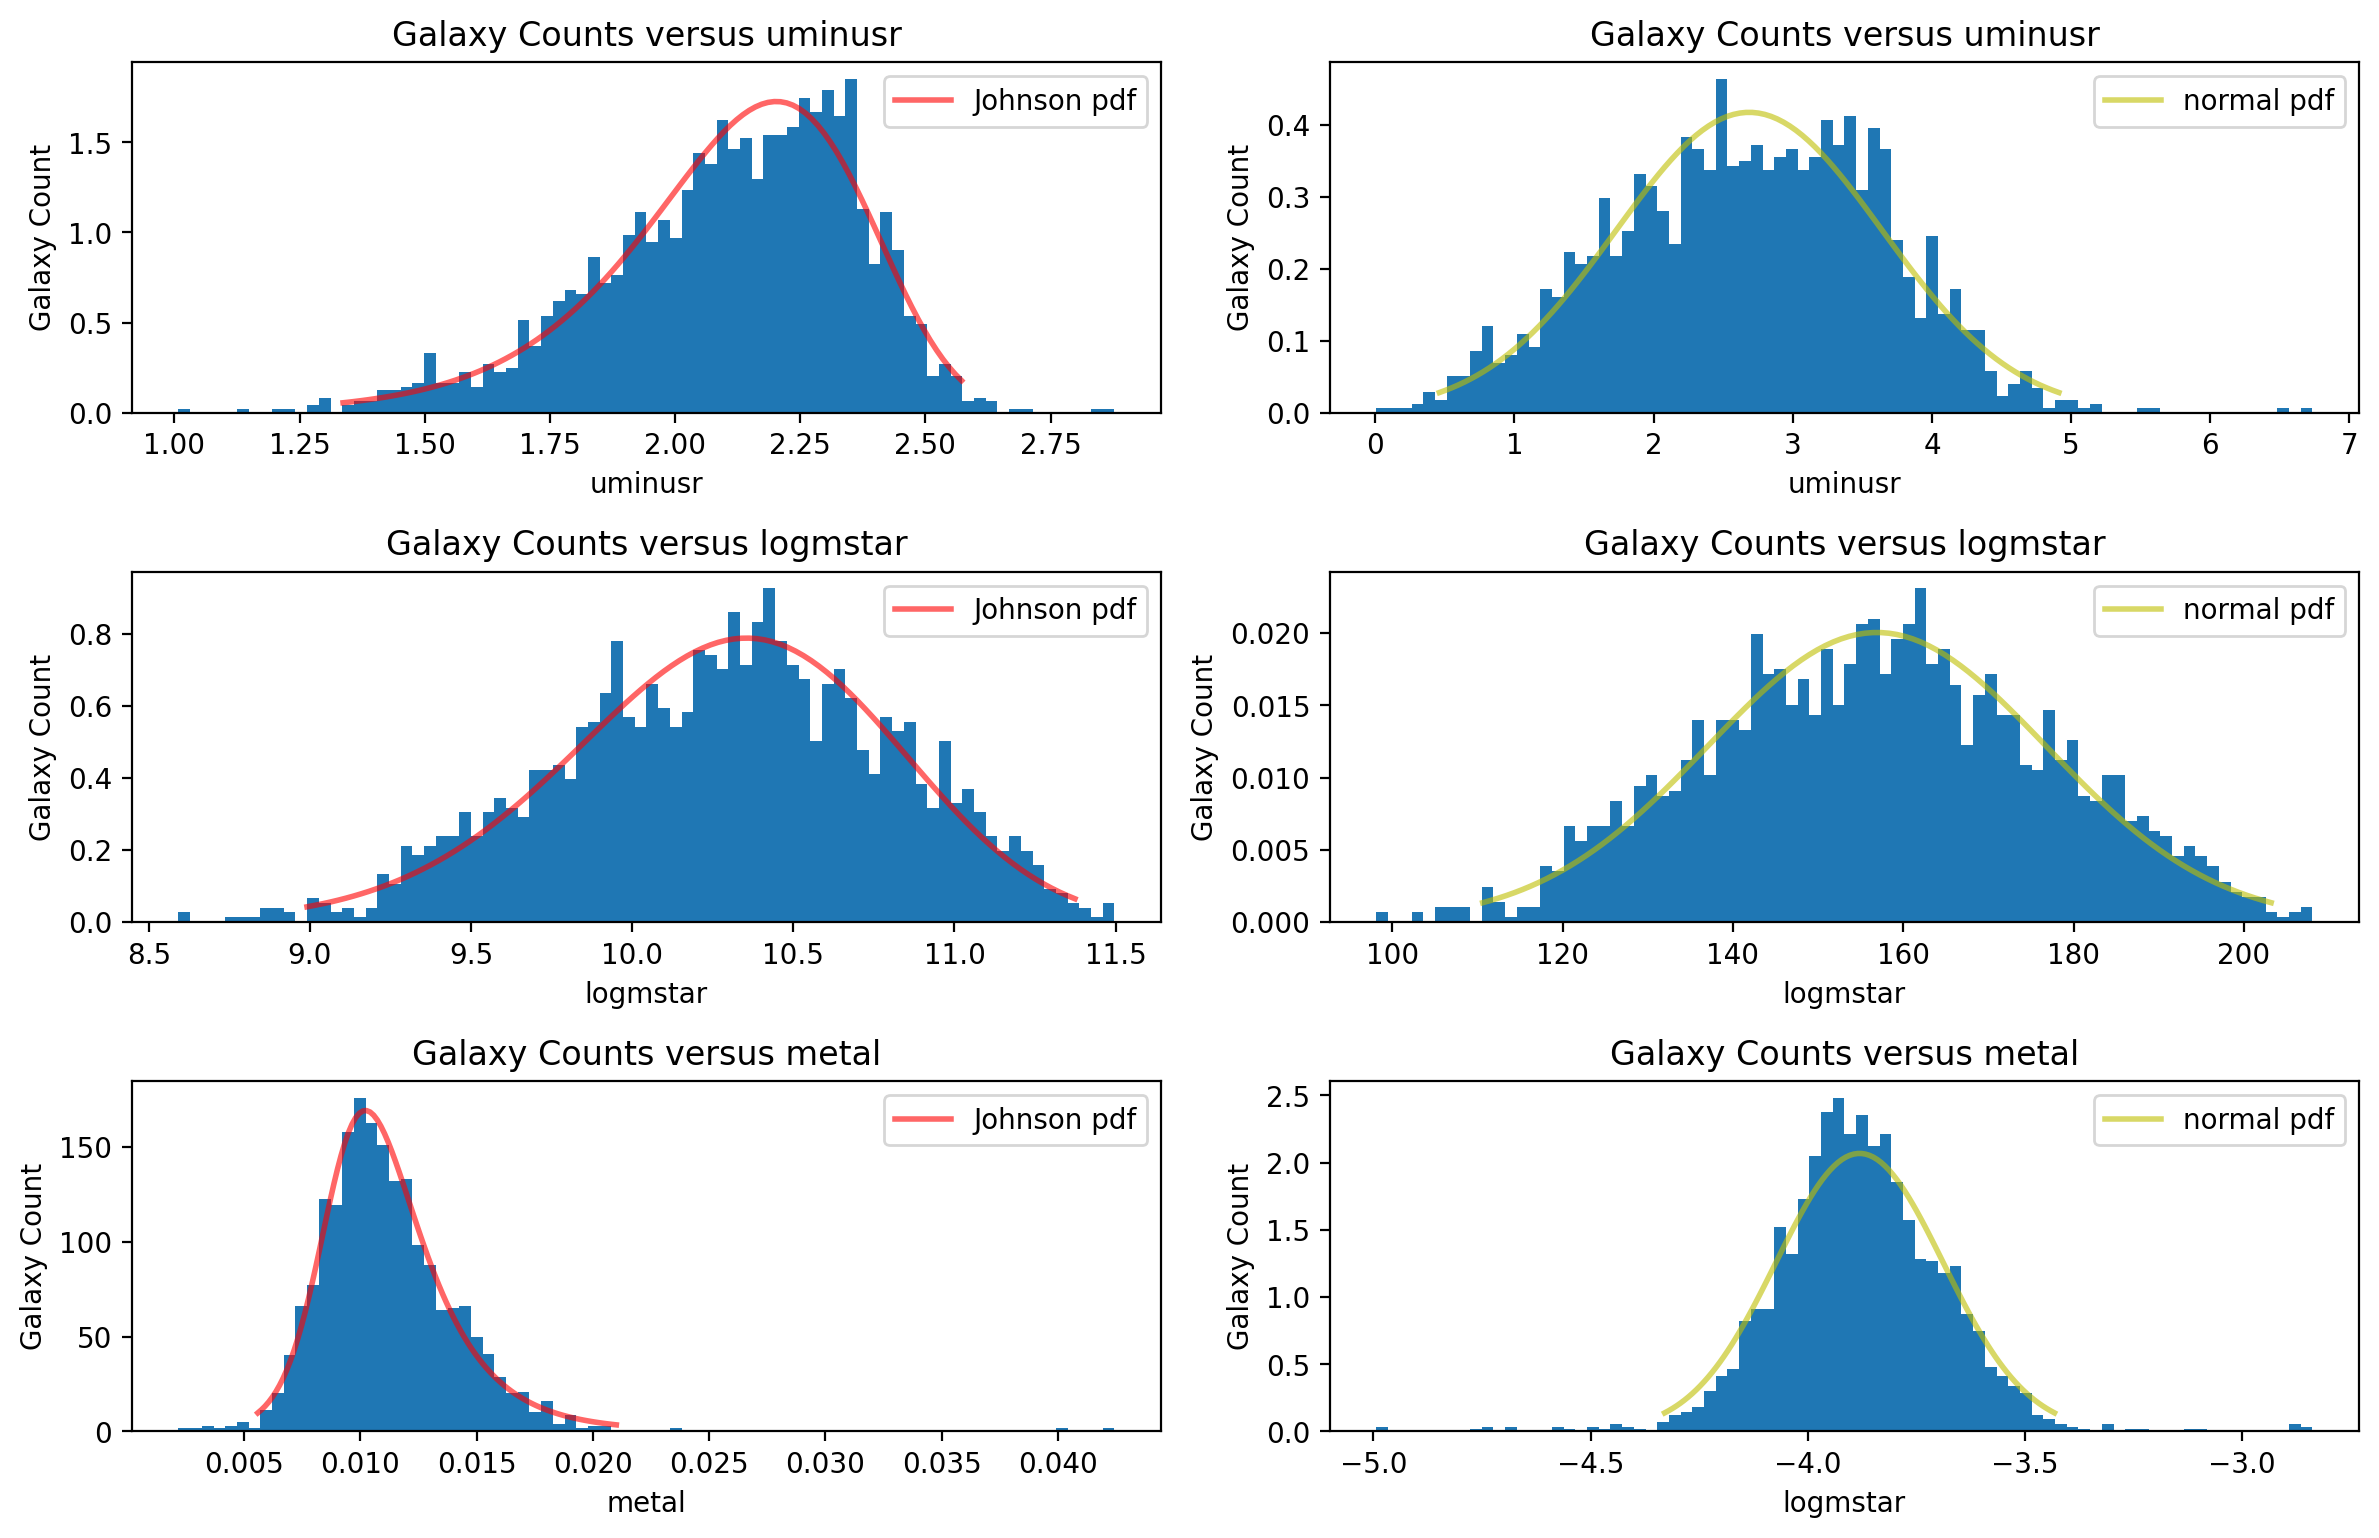

In [1]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot

#print(RawMassEClassEmeasure.colnames)
# CLEAN DATA
RErange = Table.read('../../GAMA_Data/VisualMassClassEnviron.fits')
print(len(RErange))
RErange = RErange[RErange['ELLIPTICAL_CODE'] == 1]
print(len(RErange))
RErange = RErange[RErange['SurfaceDensityFlag'] == 0]
#RErange = RErange[RErange['DistanceTo5nnFlag'] == 0]
#RErange = RErange[RErange['SurfaceDensity'] < 50]
RErange = RErange[RErange['AGEDenParFlag'] == 0]
RErange = RErange[RErange['CountInCylFlag'] == 0]
RErange = RErange[RErange['uminusr']> 0.001]
RErange = RErange[RErange['metal']> 0.001]

binCount = 80
alphaVal = .3

##### uminusr
fig = plt.figure(figsize=(12, 15), dpi=200)

#fig.suptitle('Plot - Histogram Red Galaxies for Elliptical Galaxies')
#fig.legend(loc="upper right")
#import scipy.stats as stats
from scipy import stats
xfield = 'uminusr'
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#print(counts)
ax1 = fig.add_subplot(6, 2, 1)
ax1.title.set_text('Galaxy Counts versus '+xfield)
ax1.set_ylabel('Galaxy Count')
ax1.set_xlabel(xfield)
ax1.set_xlabel('uminusr')

# Johnson on original
aj, bj, cj, dj =stats.johnsonsu.fit(RErange[xfield].data)
print(f"{xfield} Johnson fit : {aj} {bj} {cj} {dj}")
xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
xj = np.linspace(xj0,xj1,100)
ax1.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax1.hist(RErange[xfield].data, bins=binCount, density=True)
ax1.legend()         

ax2 = fig.add_subplot(6, 2, 2)
ax2.title.set_text('Galaxy Counts versus uminusr')
ax2.set_ylabel('Galaxy Count')
ax2.set_xlabel(xfield)

# Perform Cox Box
#print(stats.boxcox(RErange[xfield]))
transdata, lamda = stats.boxcox(RErange[xfield])
print(f"{xfield} BoxCox lamda {lamda}")
an ,bn =stats.norm.fit(transdata)
print(f"{xfield} Normal fit : {an} {bn}")
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)
# y values for CoxBox
yn1 = xn**lamda-1/lamda
yn2 = (lamda / xn**lamda-1)
ax2.plot(xn, stats.norm.pdf(xn, an, bn),'y-', lw=2, alpha=0.6, label='normal pdf')
#ax2.plot(xn,yn1,'r', label='Cox Box')
#ax2.plot(xn,yn2,'b', label='Cox Box Inverse')
ax2.hist(transdata, bins=binCount, density=True)
ax2.legend()
print("Need to print normal tests before & after")


xfield ='logmstar'
ax3 = fig.add_subplot(6, 2, 3)
ax3.title.set_text('Galaxy Counts versus '+xfield)
ax3.set_ylabel('Galaxy Count')
ax3.set_xlabel(xfield)
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#ax1.hist(bins[:-1],bins, weights=counts)

# Johnson on original
aj, bj, cj, dj =stats.johnsonsu.fit(RErange[xfield].data)
print(f"{xfield} Johnson fit : {aj} {bj} {cj} {dj}")
xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
xj = np.linspace(xj0,xj1,100)
ax3.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax3.hist(RErange[xfield].data, bins=binCount, density=True)
ax3.legend()

ax4 = fig.add_subplot(6, 2, 4)
ax4.title.set_text('Galaxy Counts versus '+xfield)
ax4.set_ylabel('Galaxy Count')
ax4.set_xlabel(xfield)

# Perform Cox Box
#print(stats.boxcox(RErange[xfield]))
transdata, lamda = stats.boxcox(RErange[xfield])
print(f"{xfield} BoxCox lamda {lamda}")
an ,bn =stats.norm.fit(transdata)
print(f"{xfield} Normal fit : {an} {bn}")
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)
ax4.plot(xn, stats.norm.pdf(xn, an, bn),'y-', lw=2, alpha=0.6, label='normal pdf')
ax4.hist(transdata, bins=binCount, density=True)
print("Need to print normal tests before & after")
ax4.set_xlabel('logmstar')
ax4.legend()

xfield ='metal'
ax5 = fig.add_subplot(6, 2, 5)
ax5.title.set_text('Galaxy Counts versus '+xfield)
ax5.set_ylabel('Galaxy Count')
ax5.set_xlabel(xfield)
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#ax1.hist(bins[:-1],bins, weights=counts)

# Johnson on original
aj, bj, cj, dj =stats.johnsonsu.fit(RErange[xfield].data)
print(f"{xfield} Johnson fit : {aj} {bj} {cj} {dj}")
xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
xj = np.linspace(xj0,xj1,100)
ax5.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax5.hist(RErange[xfield].data, bins=binCount, density=True)
ax5.legend()

ax6 = fig.add_subplot(6, 2, 6)
ax6.title.set_text('Galaxy Counts versus '+xfield)
ax6.set_ylabel('Galaxy Count')
ax6.set_xlabel(xfield)

# Perform Cox Box
#print(stats.boxcox(RErange[xfield]))
transdata, lamda = stats.boxcox(RErange[xfield])
print(f"{xfield} BoxCox lamda {lamda}")
an ,bn =stats.norm.fit(transdata)
print(f"{xfield} Normal fit : {an} {bn}")
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)
ax6.plot(xn, stats.norm.pdf(xn, an, bn),'y-', lw=2, alpha=0.6, label='normal pdf')
ax6.hist(transdata, bins=binCount, density=True)
print("Need to print normal tests before & after")
ax6.set_xlabel('logmstar')
ax6.legend()

fig.tight_layout()
plt.show()




